### purpose

determine K for complex sims

### notes

code inspired from lines 677-696 in https://github.com/ModelValidationProgram/MVP-NonClinalAF/blob/c43df8c373b188de208feb742ac5ec21279a4a2f/src/c-AnalyzeSimOutput.R#L677

In [1]:
library(LEA)
library(vegan)

len=length

sessionInfo()

Loading required package: permute

Loading required package: lattice


Attaching package: ‘lattice’


The following object is masked from ‘package:LEA’:

    barchart


This is vegan 2.6-2



R version 4.0.3 (2020-10-10)
Platform: x86_64-conda-linux-gnu (64-bit)
Running under: CentOS Linux 7 (Core)

Matrix products: default
BLAS/LAPACK: /work/lotterhos/brandon/anaconda3/envs/MVP_env_R4.0.3/lib/libopenblasp-r0.3.17.so

locale:
 [1] LC_CTYPE=en_US.UTF-8       LC_NUMERIC=C              
 [3] LC_TIME=en_US.UTF-8        LC_COLLATE=en_US.UTF-8    
 [5] LC_MONETARY=en_US.UTF-8    LC_MESSAGES=en_US.UTF-8   
 [7] LC_PAPER=en_US.UTF-8       LC_NAME=C                 
 [9] LC_ADDRESS=C               LC_TELEPHONE=C            
[11] LC_MEASUREMENT=en_US.UTF-8 LC_IDENTIFICATION=C       

attached base packages:
[1] stats     graphics  grDevices utils     datasets  methods   base     

other attached packages:
[1] vegan_2.6-2     lattice_0.20-45 permute_0.9-7   LEA_3.8.0      

loaded via a namespace (and not attached):
 [1] cluster_2.1.3   splines_4.0.3   MASS_7.3-57     uuid_1.1-0     
 [5] rlang_1.0.2     fastmap_1.1.0   fansi_1.0.3     tools_4.0.3    
 [9] parallel_4.0.3  grid_4.0.3  

In [2]:

lfmmfile <- '/home/b.lind/offsets/run_20220919_tutorial/lfmm2/lfmm_infiles/Genotypes.lfmm'


In [3]:
pc = pca(lfmmfile, 30, scale = TRUE)

[1] "******************************"
[1] " Principal Component Analysis "
[1] "******************************"
summary of the options:

        -n (number of individuals)          1000
        -L (number of loci)                 26371
        -K (number of principal components) 30
        -x (genotype file)                  /work/lotterhos/MVP-Offsets/run_20220919_tutorial/lfmm2/lfmm_infiles/Genotypes.lfmm
        -a (eigenvalue file)                /work/lotterhos/MVP-Offsets/run_20220919_tutorial/lfmm2/lfmm_infiles/Genotypes.pca/Genotypes.eigenvalues
        -e (eigenvector file)               /work/lotterhos/MVP-Offsets/run_20220919_tutorial/lfmm2/lfmm_infiles/Genotypes.pca/Genotypes.eigenvectors
        -d (standard deviation file)        /work/lotterhos/MVP-Offsets/run_20220919_tutorial/lfmm2/lfmm_infiles/Genotypes.pca/Genotypes.sdev
        -p (projection file)                /work/lotterhos/MVP-Offsets/run_20220919_tutorial/lfmm2/lfmm_infiles/Genotypes.pca/Genotypes.projections


In [4]:
tw = tracy.widom(pc)

[1] "*******************"
[1] " Tracy-Widom tests "
[1] "*******************"
summary of the options:

        -n (number of eigenvalues)          1000
        -i (input file)                     /work/lotterhos/MVP-Offsets/run_20220919_tutorial/lfmm2/lfmm_infiles/Genotypes.pca/Genotypes.eigenvalues
        -o (output file)                    /work/lotterhos/MVP-Offsets/run_20220919_tutorial/lfmm2/lfmm_infiles/Genotypes.pca/Genotypes.tracywidom


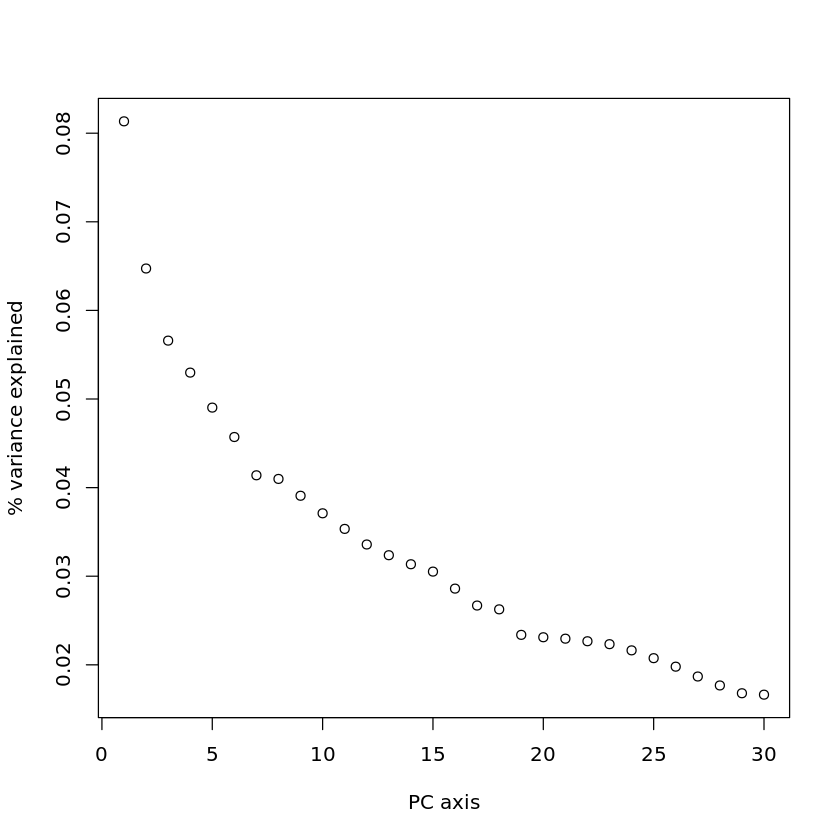

In [5]:
plot(tw$percentage, xlab='PC axis', ylab='% variance explained')

In [6]:
tw$pvalues

[1] 2.575e-05 7.643e-03 8.047e-02 8.075e-02 1.392e-01 2.167e-01 6.797e-01
 [8] 3.583e-01 3.554e-01 4.022e-01 4.383e-01 5.219e-01 4.623e-01 3.319e-01
[15] 1.498e-01 2.386e-01 5.216e-01 2.453e-01 9.875e-01 9.708e-01 9.020e-01
[22] 7.830e-01 5.647e-01 4.344e-01 3.500e-01 2.712e-01 2.569e-01 2.558e-01
[29] 3.947e-01 1.000e+00

In [11]:
sum(tw$pvalues < 0.05)

[1] 2

In [8]:
a <- tw$percentage[1:20]
b <- tw$percentage[2:21]
K1 <- max(which(a > b*1.5))
K2 <- max(which(a > b*1.4))
K3 <- max(which(a > b*1.3)) # a little safety net if the first criteria doesn't work

if (!is.infinite(K1)){K=K1}
if (is.infinite(K1)){K=K3}
if (is.infinite(K)){print("Error K is not definite"); break}
print(c("K=",K))

Warning message in max(which(a > b * 1.5)):
“no non-missing arguments to max; returning -Inf”
Warning message in max(which(a > b * 1.4)):
“no non-missing arguments to max; returning -Inf”
Warning message in max(which(a > b * 1.3)):
“no non-missing arguments to max; returning -Inf”


[1] "Error K is not definite"


ERROR: Error in eval(expr, envir, enclos): no loop for break/next, jumping to top level


In [9]:
is.infinite(K1)

[1] TRUE

In [10]:
is.infinite(K2)

[1] TRUE

In [11]:
is.infinite(K3)

[1] TRUE